# KNN model

## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

## Dataset

In [2]:
# Dados Treinamento
X_train = pd.read_csv("/home/ds_deivisson/repos/datasets/X_training_classificacao.csv")
y_train = pd.read_csv("/home/ds_deivisson/repos/datasets/y_training_classificacao.csv")

# Dados Validacao
X_val = pd.read_csv("/home/ds_deivisson/repos/datasets/X_validation_classificacao.csv")
y_val = pd.read_csv("/home/ds_deivisson/repos/datasets/y_validation_classificacao.csv")


# Dados Teste
X_test = pd.read_csv("/home/ds_deivisson/repos/datasets/X_test_classificacao.csv")
y_test = pd.read_csv("/home/ds_deivisson/repos/datasets/y_test_classificacao.csv")

# Contagem
linhas = len(y_train) + len(y_val) + len(y_test)

treino_perc = len(y_train)/linhas*100
validacao_perc = len(y_val)/linhas*100
teste_perc = len(y_test)/linhas*100

print (f" Percentual Treino: {treino_perc:.2f}")
print (f" Percentual Validacao: {validacao_perc:.2f}")
print (f" Percentual Teste: {teste_perc:.2f}")

 Percentual Treino: 56.00
 Percentual Validacao: 24.00
 Percentual Teste: 20.00


## Features/ Label

In [3]:
features = [
 'customer_type',
 #'age',
 #'flight_distance',
 'class',
 'inflight_wifi_service',
 'departure_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'on_board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 #'departure_delay_in_minutes',
 #'arrival_delay_in_minutes',
 'gender_Female',
 'type_of_travel_business_travel'
]

# Selecionando os dados

x_train_class = X_train.loc[:, features]
X_val_class = X_val.loc[:, features]
X_test_class = X_test.loc[:, features]

y_train_class = y_train.iloc[:, 0].to_numpy()
y_val_class = y_val.iloc[:, 0].to_numpy()
y_test_class = y_test.iloc[:, 0].to_numpy()

# Adicionando Escala

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train_class)
X_val_scaled = scaler.transform(X_val_class)
X_test_scaled = scaler.transform(X_test_class)

## Modelo com dados Treino

In [ ]:
# lista de K
lista = [3, 5, 7, 9, 11]

for n in lista:

  print(f"\n===== Testando k = {n} =====")

  # cria o modelo
  knn_classifier = KNeighborsClassifier( n_neighbors = n )

  # treina o modelo no conjunto de treino
  knn_classifier.fit( X_train_scaled, y_train_class )

  # previsões no conjunto de teste (melhor prática)
  y_pred = knn_classifier.predict( X_train_scaled )

  # acurácia
  accuracy = mt.accuracy_score(y_train_class, y_pred)

  # Precisao
  precision = mt.precision_score( y_train_class, y_pred)

  # Recall
  recall = mt.recall_score( y_train_class, y_pred )

  # F1_score
  f1 = mt.f1_score(y_train_class, y_pred)

  #imprimindo resultados
  #print ("Matriz de confusão:\n", confusion)
  print ('Acurácia: {:.2f}%'.format(accuracy*100))
  print ('Precisão: {:.2f}%'.format(precision*100))
  print ('Recall: {:.2f}%'.format(recall*100))
  print ('f1_score: {:.2f}%'.format(f1*100))


===== Testando k = 3 =====
Acurácia: 95.82%
Precisão: 97.42%
Recall: 92.82%
f1_score: 95.06%

===== Testando k = 5 =====
Acurácia: 94.87%
Precisão: 97.08%
Recall: 90.89%
f1_score: 93.88%

===== Testando k = 7 =====
Acurácia: 94.37%
Precisão: 96.91%
Recall: 89.88%
f1_score: 93.26%

===== Testando k = 9 =====
Acurácia: 94.06%
Precisão: 96.91%
Recall: 89.14%
f1_score: 92.86%

===== Testando k = 11 =====
Acurácia: 93.94%
Precisão: 96.83%
Recall: 88.93%
f1_score: 92.71%


## Modelo com dados Validação

In [ ]:
lista_k = [3, 5, 7, 9, 11]
thresholds = np.arange(0.1, 0.9, 0.05)

resultados = []

for k in lista_k:

    print(f"\n===== Testando k = {k} =====")

    # modelo com dados de treino
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # probabilidades com dados de validação
    y_val_proba = knn.predict_proba(X_val_scaled)[:, 1]

    for t in thresholds:

        # avaliação do threshold
        y_val_pred = (y_val_proba >= t).astype(int)

        accuracy  = mt.accuracy_score(y_val, y_val_pred)
        precision = mt.precision_score(y_val, y_val_pred)
        recall    = mt.recall_score(y_val, y_val_pred)
        f1        = mt.f1_score(y_val, y_val_pred)

        resultados.append({
            "k": k,
            "threshold": t,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1
        })

        print(
            f"k={k} | t={t:.2f} | "
            f"Acc={accuracy:.3f} | "
            f"Prec={precision:.3f} | "
            f"Rec={recall:.3f} | "
            f"F1={f1:.3f}"
        )



===== Testando k = 3 =====


/home/ds_deivisson/.pyenv/versions/3.11.14/envs/notebook_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=3 | t=0.10 | Acc=0.903 | Prec=0.845 | Rec=0.950 | F1=0.895
k=3 | t=0.15 | Acc=0.903 | Prec=0.845 | Rec=0.950 | F1=0.895
k=3 | t=0.20 | Acc=0.903 | Prec=0.845 | Rec=0.950 | F1=0.895
k=3 | t=0.25 | Acc=0.903 | Prec=0.845 | Rec=0.950 | F1=0.895
k=3 | t=0.30 | Acc=0.903 | Prec=0.845 | Rec=0.950 | F1=0.895
k=3 | t=0.35 | Acc=0.927 | Prec=0.944 | Rec=0.883 | F1=0.913
k=3 | t=0.40 | Acc=0.927 | Prec=0.944 | Rec=0.883 | F1=0.913
k=3 | t=0.45 | Acc=0.927 | Prec=0.944 | Rec=0.883 | F1=0.913
k=3 | t=0.50 | Acc=0.927 | Prec=0.944 | Rec=0.883 | F1=0.913
k=3 | t=0.55 | Acc=0.927 | Prec=0.944 | Rec=0.883 | F1=0.913
k=3 | t=0.60 | Acc=0.927 | Prec=0.944 | Rec=0.883 | F1=0.913
k=3 | t=0.65 | Acc=0.927 | Prec=0.944 | Rec=0.883 | F1=0.913
k=3 | t=0.70 | Acc=0.903 | Prec=0.983 | Rec=0.791 | F1=0.876
k=3 | t=0.75 | Acc=0.903 | Prec=0.983 | Rec=0.791 | F1=0.876
k=3 | t=0.80 | Acc=0.903 | Prec=0.983 | Rec=0.791 | F1=0.876
k=3 | t=0.85 | Acc=0.903 | Prec=0.983 | Rec=0.791 | F1=0.876

===== Testando k = 5 ==

/home/ds_deivisson/.pyenv/versions/3.11.14/envs/notebook_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=5 | t=0.10 | Acc=0.879 | Prec=0.797 | Rec=0.969 | F1=0.874
k=5 | t=0.15 | Acc=0.879 | Prec=0.797 | Rec=0.969 | F1=0.874
k=5 | t=0.20 | Acc=0.926 | Prec=0.904 | Rec=0.927 | F1=0.915
k=5 | t=0.25 | Acc=0.926 | Prec=0.904 | Rec=0.927 | F1=0.915
k=5 | t=0.30 | Acc=0.926 | Prec=0.904 | Rec=0.927 | F1=0.915
k=5 | t=0.35 | Acc=0.926 | Prec=0.904 | Rec=0.927 | F1=0.915
k=5 | t=0.40 | Acc=0.927 | Prec=0.949 | Rec=0.880 | F1=0.913
k=5 | t=0.45 | Acc=0.927 | Prec=0.949 | Rec=0.880 | F1=0.913
k=5 | t=0.50 | Acc=0.927 | Prec=0.949 | Rec=0.880 | F1=0.913
k=5 | t=0.55 | Acc=0.927 | Prec=0.949 | Rec=0.880 | F1=0.913
k=5 | t=0.60 | Acc=0.916 | Prec=0.977 | Rec=0.825 | F1=0.894
k=5 | t=0.65 | Acc=0.916 | Prec=0.977 | Rec=0.825 | F1=0.894
k=5 | t=0.70 | Acc=0.916 | Prec=0.977 | Rec=0.825 | F1=0.894
k=5 | t=0.75 | Acc=0.916 | Prec=0.977 | Rec=0.825 | F1=0.894
k=5 | t=0.80 | Acc=0.887 | Prec=0.992 | Rec=0.745 | F1=0.851
k=5 | t=0.85 | Acc=0.887 | Prec=0.992 | Rec=0.745 | F1=0.851

===== Testando k = 7 ==

/home/ds_deivisson/.pyenv/versions/3.11.14/envs/notebook_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=7 | t=0.10 | Acc=0.859 | Prec=0.763 | Rec=0.978 | F1=0.857
k=7 | t=0.15 | Acc=0.916 | Prec=0.871 | Rec=0.946 | F1=0.907
k=7 | t=0.20 | Acc=0.916 | Prec=0.871 | Rec=0.946 | F1=0.907
k=7 | t=0.25 | Acc=0.916 | Prec=0.871 | Rec=0.946 | F1=0.907
k=7 | t=0.30 | Acc=0.929 | Prec=0.924 | Rec=0.912 | F1=0.918
k=7 | t=0.35 | Acc=0.929 | Prec=0.924 | Rec=0.912 | F1=0.918
k=7 | t=0.40 | Acc=0.929 | Prec=0.924 | Rec=0.912 | F1=0.918
k=7 | t=0.45 | Acc=0.929 | Prec=0.954 | Rec=0.878 | F1=0.914
k=7 | t=0.50 | Acc=0.929 | Prec=0.954 | Rec=0.878 | F1=0.914
k=7 | t=0.55 | Acc=0.929 | Prec=0.954 | Rec=0.878 | F1=0.914
k=7 | t=0.60 | Acc=0.920 | Prec=0.974 | Rec=0.837 | F1=0.900
k=7 | t=0.65 | Acc=0.920 | Prec=0.974 | Rec=0.837 | F1=0.900
k=7 | t=0.70 | Acc=0.920 | Prec=0.974 | Rec=0.837 | F1=0.900
k=7 | t=0.75 | Acc=0.903 | Prec=0.987 | Rec=0.787 | F1=0.876
k=7 | t=0.80 | Acc=0.903 | Prec=0.987 | Rec=0.787 | F1=0.876
k=7 | t=0.85 | Acc=0.903 | Prec=0.987 | Rec=0.787 | F1=0.876

===== Testando k = 9 ==

/home/ds_deivisson/.pyenv/versions/3.11.14/envs/notebook_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=9 | t=0.10 | Acc=0.841 | Prec=0.737 | Rec=0.983 | F1=0.843
k=9 | t=0.15 | Acc=0.905 | Prec=0.844 | Rec=0.958 | F1=0.898
k=9 | t=0.20 | Acc=0.905 | Prec=0.844 | Rec=0.958 | F1=0.898
k=9 | t=0.25 | Acc=0.925 | Prec=0.901 | Rec=0.930 | F1=0.915
k=9 | t=0.30 | Acc=0.925 | Prec=0.901 | Rec=0.930 | F1=0.915
k=9 | t=0.35 | Acc=0.931 | Prec=0.935 | Rec=0.903 | F1=0.919
k=9 | t=0.40 | Acc=0.931 | Prec=0.935 | Rec=0.903 | F1=0.919
k=9 | t=0.45 | Acc=0.929 | Prec=0.957 | Rec=0.876 | F1=0.915
k=9 | t=0.50 | Acc=0.929 | Prec=0.957 | Rec=0.876 | F1=0.915
k=9 | t=0.55 | Acc=0.929 | Prec=0.957 | Rec=0.876 | F1=0.915
k=9 | t=0.60 | Acc=0.922 | Prec=0.973 | Rec=0.843 | F1=0.904
k=9 | t=0.65 | Acc=0.922 | Prec=0.973 | Rec=0.843 | F1=0.904
k=9 | t=0.70 | Acc=0.910 | Prec=0.984 | Rec=0.805 | F1=0.885
k=9 | t=0.75 | Acc=0.910 | Prec=0.984 | Rec=0.805 | F1=0.885
k=9 | t=0.80 | Acc=0.893 | Prec=0.992 | Rec=0.758 | F1=0.860
k=9 | t=0.85 | Acc=0.893 | Prec=0.992 | Rec=0.758 | F1=0.860

===== Testando k = 11 =

/home/ds_deivisson/.pyenv/versions/3.11.14/envs/notebook_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=11 | t=0.10 | Acc=0.895 | Prec=0.822 | Rec=0.967 | F1=0.888
k=11 | t=0.15 | Acc=0.895 | Prec=0.822 | Rec=0.967 | F1=0.888
k=11 | t=0.20 | Acc=0.919 | Prec=0.879 | Rec=0.942 | F1=0.910
k=11 | t=0.25 | Acc=0.919 | Prec=0.879 | Rec=0.942 | F1=0.910
k=11 | t=0.30 | Acc=0.928 | Prec=0.915 | Rec=0.919 | F1=0.917
k=11 | t=0.35 | Acc=0.928 | Prec=0.915 | Rec=0.919 | F1=0.917
k=11 | t=0.40 | Acc=0.930 | Prec=0.940 | Rec=0.896 | F1=0.918
k=11 | t=0.45 | Acc=0.930 | Prec=0.940 | Rec=0.896 | F1=0.918
k=11 | t=0.50 | Acc=0.929 | Prec=0.958 | Rec=0.873 | F1=0.914
k=11 | t=0.55 | Acc=0.922 | Prec=0.970 | Rec=0.847 | F1=0.904
k=11 | t=0.60 | Acc=0.922 | Prec=0.970 | Rec=0.847 | F1=0.904
k=11 | t=0.65 | Acc=0.914 | Prec=0.982 | Rec=0.816 | F1=0.891
k=11 | t=0.70 | Acc=0.914 | Prec=0.982 | Rec=0.816 | F1=0.891
k=11 | t=0.75 | Acc=0.901 | Prec=0.989 | Rec=0.781 | F1=0.873
k=11 | t=0.80 | Acc=0.901 | Prec=0.989 | Rec=0.781 | F1=0.873
k=11 | t=0.85 | Acc=0.884 | Prec=0.994 | Rec=0.736 | F1=0.846


In [6]:
df_results = pd.DataFrame(resultados)

best = df_results.loc[df_results["f1"].idxmax()]

best_k = int(best["k"])
best_threshold = best["threshold"]

print("\n🏆 MELHOR CONFIGURAÇÃO")
print(f"k = {best_k}")
print(f"threshold = {best_threshold:.2f}")
print(f"F1 validação = {best['f1']:.3f}")



🏆 MELHOR CONFIGURAÇÃO
k = 9
threshold = 0.35
F1 validação = 0.919


## Modelo com dados teste (x de treino + validacao)

In [ ]:
# concatenação dados treino e validação
X_train_full = np.vstack([X_train_scaled, X_val_scaled])
y_train_full = np.hstack([y_train_class, y_val_class])

# modelo final
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_full, y_train_full)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",9
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [ ]:
# predição e métricas
y_test_proba = knn_final.predict_proba(X_test_scaled)[:, 1]
y_test_pred  = (y_test_proba >= best_threshold).astype(int)

print(f"Acuracia: {mt.accuracy_score(y_test_class, y_test_pred):.3f}")
print(f"Precisao: {mt.precision_score(y_test_class, y_test_pred):.3f}")
print(f"Recall: {mt.recall_score(y_test_class, y_test_pred):.3f}")
print(f"F1 teste: {mt.f1_score(y_test_class, y_test_pred):.3f}")

# métricas threshold-independent
roc_auc = mt.roc_auc_score(y_test_class, y_test_proba)
pr_auc  = mt.average_precision_score(y_test, y_test_proba)

print(f"ROC-AUC: {roc_auc:.3f}")
print(f"PR-AUC : {pr_auc:.3f}")

Acuracia: 0.934
Precisao: 0.936
Recall: 0.912
F1 teste: 0.924
ROC-AUC: 0.978
PR-AUC : 0.972


## Curva ROC

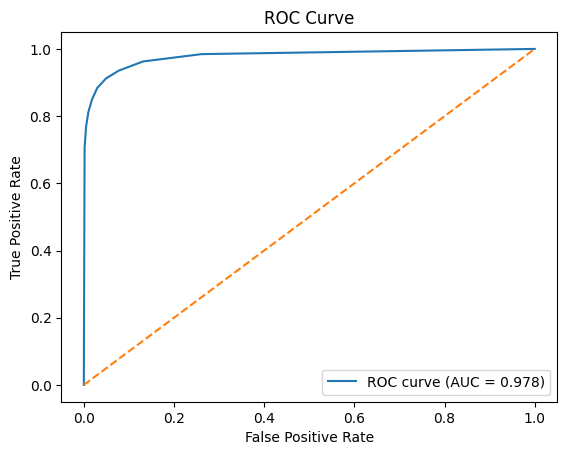

In [9]:
fpr, tpr, thresholds_roc = mt.roc_curve(y_test_class, y_test_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Curva Precision-Recall (PR Curve)

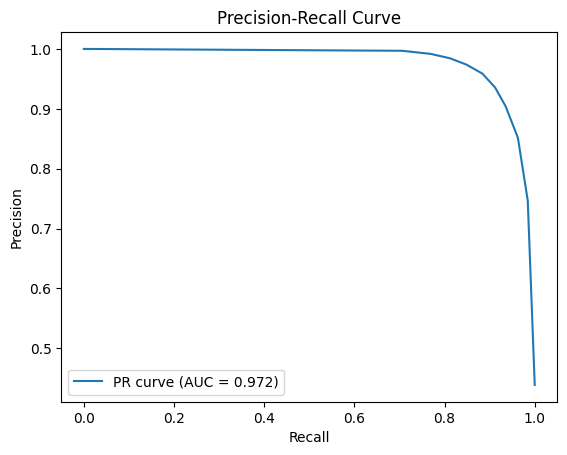

In [10]:
precision, recall, thresholds_pr = mt.precision_recall_curve(y_test_class, y_test_proba)

plt.figure()
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()